<a href="https://colab.research.google.com/github/Keenmuhammad/MAHE-R/blob/main/Webinar6(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Load essential libraries

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler

---

Demonstration of splitting samples into batches for batch processing using a simple example

---

In [15]:
num_samples = 11 # total number of samples
num_iters = 10   # number of iterations
batch_size = 16   # number of samples for calculating loss and gradient in each iteration

print('Number of samples = %d'%(num_samples))
print('Number of iterations = %d'%(num_iters))
print('Batch size = %d'%(batch_size))

Number of samples = 11
Number of iterations = 10
Batch size = 16


---

User-defined function to generate sample indices for batch processing according to batch size

---

In [ ]:
np.arange(3, 10, 2)
np.random.choice([10, 20, 30, 40, 50], 3, replace = True, p = [0.1, 0.1, 0.2, 0.2, 0.4])
myarray = np.arange(10)
print(myarray)
chunks = np.array_split(myarray, 6)
chunks = np.array_split(myarray, [3, 6, 9])
print(chunks)
print(type(chunks))
#print(chunks.dtype)

[0 1 2 3 4 5 6 7 8 9]
[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8]), array([9])]
<class 'list'>


In [ ]:
reordered_sample_indices = np.random.choice(num_samples, num_samples, replace = False)
print(reordered_sample_indices)
print(np.arange(batch_size, num_samples, batch_size))
np.array_split(reordered_sample_indices, np.arange(batch_size, len(reordered_sample_indices), batch_size))

[ 6  3  5  1  4 10  2  9  0  7  8]
[3 6 9]


[array([6, 3, 5]), array([ 1,  4, 10]), array([2, 9, 0]), array([7, 8])]

In [ ]:
def generate_batch_indices():
  # Reorder sample indices
  reordered_sample_indices = np.random.choice(num_samples, num_samples, replace = False)
  # Generate batch indices for batch processing
  batch_indices = np.array_split(reordered_sample_indices, np.arange(batch_size, len(reordered_sample_indices), batch_size))
  return(batch_indices)

In [ ]:
generate_batch_indices()

[array([1, 7, 0]), array([6, 2, 9]), array([8, 4, 3]), array([10,  5])]

---

The batch processiong loop

---

In [17]:
np.arange(1000)
range(1000)

range(0, 1000)

In [18]:
for it in range(11):
  print(it)

0
1
2
3
4
5
6
7
8
9
10


In [16]:
# Number of batches per epoch
num_iterations_per_epoch = int(np.ceil(num_samples/batch_size)) 
print('Number of iterations per epoch = %d\n'%(num_iterations_per_epoch))
b = 0
epoch = 0
for it in range(num_iters):
  if it % num_iterations_per_epoch == 0:# check if we are at the start of an epoch
    print('--------------------------------')
    print('Epoch %d:'%(epoch))
    batch_indices = generate_batch_indices()
    b = 0 
    epoch = epoch + 1   
    print('--------------------------------')
  print('In iteration %d, using samples' % (it))
  print(batch_indices[b])  
  b += 1

Number of iterations per epoch = 1

--------------------------------
Epoch 0:
--------------------------------
In iteration 0, using samples
[ 5  8  2  6  0  9  4 10  7  3  1]
--------------------------------
Epoch 1:
--------------------------------
In iteration 1, using samples
[ 9  7  0  4 10  3  2  6  1  8  5]
--------------------------------
Epoch 2:
--------------------------------
In iteration 2, using samples
[10  0  9  8  5  4  2  1  3  7  6]
--------------------------------
Epoch 3:
--------------------------------
In iteration 3, using samples
[ 8  0  3  1  9  5  7  2  4  6 10]
--------------------------------
Epoch 4:
--------------------------------
In iteration 4, using samples
[ 7  8  4  0 10  2  9  6  1  5  3]
--------------------------------
Epoch 5:
--------------------------------
In iteration 5, using samples
[ 2  7  1  6  5  3 10  4  0  9  8]
--------------------------------
Epoch 6:
--------------------------------
In iteration 6, using samples
[ 9  3  6  4  7  2 

---

Generate artificial data with 11 samples, 2 features per sample and 3 output classes.

---

In [ ]:
num_samples = 11 # number of samples
num_features = 2 # number of features (a.k.a. dimensionality)
num_labels = 3 # number of output labels

# Data matrix (each column = single sample)
X = np.random.choice(np.arange(0, 5), size = (num_features, num_samples), replace = True)

# Class labels
y = np.random.choice([0, 1, 2], size = num_samples, replace = True)

print('Data matrix X = ')
print(X)
print('Data labels y = ')
print(y)

Data matrix X = 
[[4 2 0 0 2 2 1 0 2 1 4]
 [2 0 3 3 3 0 1 4 2 3 3]]
Data labels y = 
[0 2 2 0 1 0 0 0 1 2 2]


---

Batch gradient descent for the softmax classification algorithm

---

In [ ]:
# Initial weights matrix
W = 0.01 * np.random.randn(num_labels, num_features)

num_iters = 10        # number of iterations
batch_size = 3        # number of samples in each batch
learning_rate = 1e-02 # learning rate

print('Number of samples = %d'%(num_samples))
print('Number of iterations = %d'%(num_iters))
print('Batch size = %d'%(batch_size))

## Batch Gradient descent loop
b = 0
epoch = 0
num_batches_per_epoch = int(np.ceil(num_samples/batch_size)) # number of batches per epoch
print('Number of batches per epoch = %d\n'%(num_batches_per_epoch))
it_loss_history = [] # initialize empty list for storing loss history over each iteration
epoch_loss_history = [] # initialize empty list for storing loss history over each epoch

for it in range(num_iters):
  # Generate batch indices if all samples have been seen at this iteration
  if it % num_batches_per_epoch == 0:
    batch_indices = generate_batch_indices()
    b = 0
    if epoch >= 1:
      epoch_avg_loss = np.mean(it_loss_history[it-len(batch_indices):it])
      print('----------------------------------')
      print('Epoch: %d, Loss = %f' % (epoch, epoch_avg_loss))  
      print('----------------------------------')
      epoch_loss_history.append(epoch_avg_loss) # append average epoch loss  
    epoch = epoch + 1 
      
  # Evaluate loss and gradient on batch samples
  batch_sample_size = len(batch_indices[b]) # number of samples in each batch
  
  # Calculate the scores matrix
  S = np.dot(W, X[:, batch_indices[b]])

  # Calculate the probability matrix
  P = np.exp(S) / np.sum(np.exp(S), axis = 0)

  # Calculate loss for all samples in current batch
  loss = -np.log(P[y[batch_indices[b]], np.arange(batch_sample_size)])

  # Calculate total average data loss for current batch
  loss_data = np.mean(loss)
    
  # Adjust probability matrix such that 1 is subtracted from each batch sample's
  # correct category probability
  P[y[batch_indices[b]], np.arange(batch_sample_size)] -= 1

  # Calculate the gradient w.r.t. weights of the data loss
  dW = (1/batch_sample_size) * np.dot(P, X[:, batch_indices[b]].T) 

  # Update weights matrix
  W = W - learning_rate * dW
   
  # Append iteration loss history and print loss once every iteration
  it_loss_history.append(loss_data)
  print('# In iteration %d, using samples' % (it+1))
  print(batch_indices[b]) 
  print('Loss = %f'%(loss_data))
  
  b += 1 

---

**Ws the jury selection biased?**

---

In 1963, a county court in Alabama, U.S.A, convicted a young African-American man named Robert Swain of a heinous crime and sentenced him to death. At the time, only men aged 21 or older were allowed to serve on juries in that county where in 26% of the eligible jurors were African-American. However, for the 100-member jury panel for the case's trial, only 8 eligible African-American men were selected. None of those selected 8 African-American men ended up being part of the actual jury panel for the trial. Mr. Swain appealed his sentence, citing among other factors the all-Caucasian jury.

In 1965, the Supreme Court of the United States denied Swain’s appeal. In its ruling, the Court observed that the overall percentage disparity of African-Americans has been small and was not due to any concerted effort.

The percentage disparity in this case was 8% (the percentage of African-American jurors on the jury panel) compared to 26% (the percentage of African-American people eligible for jury service). How could we decide if that quoted disparity is small?

---

To answer this question, we will simulate a jury pool assuming that that each juror has been randomly selected from the eligible population. That is, for any one juror, there is a probability of 26% that they are African-American.

---

In [27]:
# Simulate a 100-member jury panel
Jury_Panel = np.random.choice(['C', 'A'], size = 100, replace = True, p = [0.74, 0.26])
a = np.mean(Jury_Panel == 'A')
b = np.count_nonzero(Jury_Panel == 'A')
print(a)
print(b)

0.39
39


---

We will now simualte the 100-member jury panel several times and see if it is actually reasonably likely to have a jury panel with 8 African-Americans.

---

In [28]:
nsimulations = 100
# Make an empty counts array, to append to
counts = np.array([], dtype = int)
for j in range(nsimulations):
  Jury_Panel = np.random.choice(['C', 'A'], size = 100, replace = True, p = [0.74, 0.26])
  counts = np.append(counts, np.count_nonzero(Jury_Panel == 'A'))   

---

Plot a histogram of the number of African-American jurors.

---

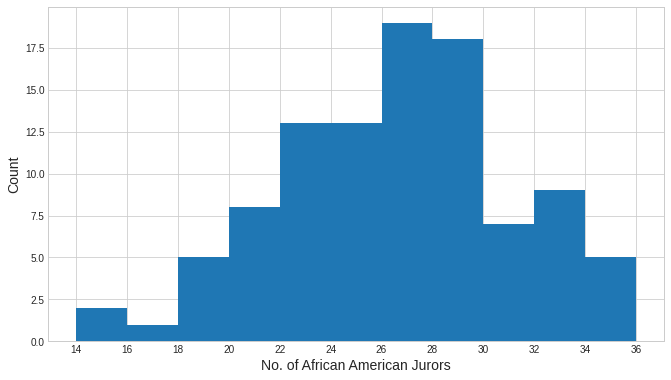

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
fig.tight_layout(pad = 4.0)
binwidth = 2
ax.hist(counts, bins = range(min(counts), max(counts) + binwidth, binwidth))
ax.set_xlabel('No. of African American Jurors', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_xticks(range(min(counts), max(counts) + binwidth, binwidth));

---

Load the iris dataset

---

In [33]:
from sklearn import datasets
iris = datasets.load_iris()

---

What is inside the 'iris' object?

---

In [34]:
type(iris)
X = iris.data
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(150, 4)


In [ ]:
a = X[:, 2]
#print(np.sum(a)/len(a))
print(np.mean(a))
print(np.median(a))
# What fraction of samples have a sepal length <= median sepal length
#print(a)
#print(np.mean(a >= np.median(a))*100) 
# Median is the 50th percentile
#print(np.percentile(a, 50))
# 90th percentile
#print(np.percentile(a, 90))
#print(np.mean(a <= np.percentile(a, 90))*100)
print(np.var(a))
np.mean((a - np.mean(a))**2)
print(np.std(a))
np.sqrt(np.mean((a - np.mean(a))**2))

---

Plot a histogram of the number of sepal lengths.

---

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
fig.tight_layout(pad = 4.0)
binwidth = 2
ax.hist(counts, bins = range(min(counts), max(counts) + binwidth, binwidth))
ax.set_xlabel('Sepal length', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_title('Sepal Length Distribution in Iris Flower', fontsize = 16)
ax.set_xticks(range(min(counts), max(counts) + binwidth, binwidth));

---

User-defined function to make a component plot of an array

---

In [ ]:
def plotveccomp(x, name = None, axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = 'black', marker = 'o') 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('Sample #', fontsize = 16)
  ax.set_ylabel(name, fontsize = 16)
  ax.set_title(' '.join(name.split()[0:2]) +  ' Array', fontsize = 14)

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (8, 8))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'Sepal Length', ax1)

---

Mount Google Drive folder

---

In [ ]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

---

Setup working directory and data directory.

---

In [ ]:
DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/Office of Online Education/'
DATA_DIR = DIR + 'Data/'

---

Load Data

---

In [ ]:
FILE = DATA_DIR + 'food-texture.csv'
df_food = pd.read_csv(FILE, index_col = 0)
df_food.head()

---

Print the names of the rows & columns in the dataframe

---

In [ ]:
print(df_food.index)
print(df_food.columns)

---

Get values in the 'Density' column

---

In [ ]:
print(df_food['Density'])

---

Get features for the sample B136

---

In [ ]:
print(df_food.loc['B136', :])

---

Get 'Oil' and 'Density' values for the samples B136 and B225.


---

In [ ]:
feature_names = ['Oil', 'Density']
sample_names = ['B136', 'B225']
#df_food[feature_names]
df_food_sub = df_food.loc[sample_names, feature_names]
print(df_food_sub)

In [ ]:
## Object type
#type(df_food)
#type(df_food['Oil'])
#type(df_food['Oil'].values)
#type(df_food.loc['B136', :])
#type(df_food.loc['B136', 'Oil'])
#df_food['Oil'].dtype
#type(df_food[feature_names])
#df_food[feature_names].dtypes
df_food.dtypes

---

Create a list of continuous and categorical column names and set types accordingly

---

In [ ]:
continuous_cols = ['Oil', 'Density', 'Fracture', 'Hardness']
categorical_cols = ['Crispy']

# Typecasting
df_food[categorical_cols] = df_food[categorical_cols].astype('category')
df_food[continuous_cols] = df_food[continuous_cols].astype('float64')

df_food.dtypes

---

Simulating a data centre-resource dataframe

---

In [ ]:
np.random.seed(100)
nsamples = 10
colnames = ['Number of Cores', 'Memory', 'Disk Space', 'Network Bandwidth']
data = zip(np.random.choice(np.arange(2,17), nsamples),
           np.random.choice([16, 32, 64, 128], nsamples),
           np.random.choice([128, 256, 512, 1024], nsamples),
           np.random.choice(100*np.arange(2, 11), nsamples))
df_resource = pd.DataFrame(list(data), columns = colnames)
df_resource['Power Consumption'] = np.random.normal(2, df_resource['Memory'] / (np.max(df_resource['Memory'])-np.min(df_resource['Memory'])), nsamples)
df_resource.head()

---

Handling time series data

---

In [ ]:
FILE = DATA_DIR + 'testdata.csv'
df = pd.read_csv(FILE, sep = ",", header = 0)
df['time'] = pd.to_datetime(df['time'], format='%m-%d-%Y %H.%M')
df.loc[:, (df.columns != 'time')] = df.loc[:, df.columns != 'time'].apply(pd.to_numeric, errors = 'coerce')
df = df.set_index('time')
df.head()

In [ ]:
## Plot percentage of missing values (NaNs) for each feature
cutoff = 30
fig = plt.figure(figsize=(6, 6))
percent_missing = (df.isna().sum() / df.shape[0]) * 100
percent_missing.plot(kind = 'bar', color = cm.rainbow(np.linspace(0, 1, 2))[(percent_missing <= cutoff).values.astype(int)])
plt.plot(np.arange(df.shape[1]), np.repeat(cutoff, df.shape[1]), 'g--') 
fig.suptitle('Percentage Missing Values Across All Features', fontsize = 20)
plt.xlabel('Feature', fontsize = 16)
plt.ylabel('% Missing Values', fontsize = 16)

In [ ]:
## Linear interpolation for one column
#df['Cyclone_Inlet_Gas_Temp'] = df['Cyclone_Inlet_Gas_Temp'].interpolate(method = 'linear')
df.loc[:, (df.columns != 'time')] = df.loc[:, df.columns != 'time'].interpolate(method = 'linear')
(df.isna().sum() / df.shape[0]) * 100

In [ ]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer

In [ ]:
feature = df.columns[0] # 
sampling_period = 1 # in seconds of the dataset as provided
time_period = '10min' # for each sample
scaler = {'identity': FunctionTransformer(lambda x: x), 'standard': StandardScaler()}
df1 = pd.DataFrame(scaler['identity'].fit_transform(df))
df1.index = df.index.copy()
df1.columns = df.columns.copy()
df_samples = df1.groupby(pd.Grouper(freq = time_period)).apply(lambda x: x[feature].values if len(x[feature].values) == int(pd.Timedelta(time_period).total_seconds()) else np.nan)
df_samples = df_samples.dropna()
df_samples.head()